
<div style="float: left; width: 25%;">
<ul>
<img src="http://www.minesnewsroom.com/sites/default/files/wysiwyg-editor/photos/CO-Mines-logo-stacked-4C-200x235w.png" style="height: 115px;">
</ul>
</div>

<div style="float: right; width: 75%;">
<ul>
    <h1> CSCI 250 - Building a Sensor System </h1>
    <span style="color:red">
        <h2> Lab 3b: Data noise </h2>
        <h3> Alex Langfield  </h3>
    </span>
</ul>
</div>

# Introduction

This goal of this lab is analyze data collected from analog sensors and to determine their noise characteristics. We will use a potentiometer and a photoresistor to collect and analyze a large data volume.

# Before you begin

<img src="http://www.dropbox.com/s/fcucolyuzdjl80k/todo.jpg?raw=1" width="10%" align="left">

Complete the [Night Light](l_NightLight.ipynb) lab before proceeding with this one. This exercise does not require any new hardware from the previous lab.

# Lab Directions

Your goal for this lab is to collect voltage data from the potentiometer and photoresistor to determine which is noisier (returns random deviations from a central value). You are asked to collect a large volume of data into numpy arrays and generate a 2D histogram of the two measurements to determine the statistical characteristics of each sensor. 

**Specific lab requirements**:
* Use the `readADC()` function in `spiUtils.py` to measure the **voltages** from both sensors.
    * Don't calculate the resistance of the photoresistor, just keep everything in the same units of voltage.
    * Collect data from both sensors continuously for 2 min and store them in NumPy arrays.
* Create 1D plots for the voltage of each sensor versus time.
    * Display the plots over-under
* Create 1D histograms for each sensor.
    * Display the plots side-by-side
* Create a 2D histogram of the voltages measured from the potentiometer and photoresistor.
* Find the mean and standard deviation of each array of data
    * Label the location of the mean on your 2D plot using [`plt.text(x, y, s)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html)
* All plots should be well formatted (e.g. axis labels, plot titles, etc.)
    * Feel free to get creative with your plots!

**Hint**: you will likely find that a few voltage values are most abundant, and that you can't see the other voltages on your 2D histograms. To better visualize the less frequent voltage measurements, you can truncate the more frequent voltages by using something like:

`histData( histData>myThreshold ) = myThreshold` 

(use this only for your 2D histogram, and nowhere else).

Begin your answer from the starter code provided below. Make use of knowledge acquired during previous labs. Add comments throughout your code so we can understand what it does. Even if you can't figure out how to write the code for something, a comment explaining what you wanted will get partial credit.

**Extra credit**:
* Perform the same experiment on other analog sensors from the kit. Rank the tested sensors by noise level.
    * Also do this for a floating pin.
* Anything of your own creation that you feel is worthy of extra credit. Be sure to explain clearly your intentions.

In [97]:
import spiUtils as su
import numpy as np
import matplotlib.pyplot as plt
import time 

#Define what the Array will be below

VpotenArray = np.array(range(0), dtype = 'float')     
VphotoArray = np.array(range(0), dtype = 'float')
TimeArray   = np.array(range(0), dtype = 'float')


timeout = 60*2    #Define the loop duration

timeout_start = time.time()  

try:
    while time.time() < timeout_start + timeout: # While loop to take data from the sensor
        
        poten = su.readADC(channel=1)
        Vpoten = poten*3.3/1023
        
        photo = su.readADC(channel=0)
        Vphoto = photo*3.3/1023        
        
        #Array Appending to draw addative data 
        
        VpotenArray = np.append(VpotenArray, [Vpoten])
        VphotoArray = np.append(VphotoArray, [Vphoto])
        TimeArray   = np.append(TimeArray, [time.time()-timeout_start])  

except(KeyboardInterrupt, SystemExit):
    print("Interrupt!")

finally:
    print("Done!")     # close ADC

Done!


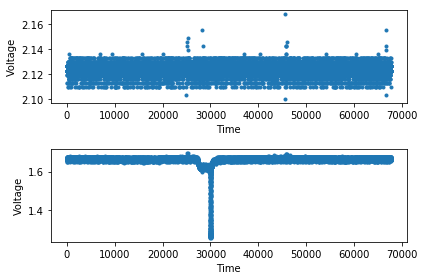

In [98]:
#Plotting V vs T

plt.subplot(2,1,1)
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.tight_layout()
plt.plot(VpotenArray,'.');

plt.subplot(2,1,2)
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.tight_layout()
plt.plot(VphotoArray,'.');



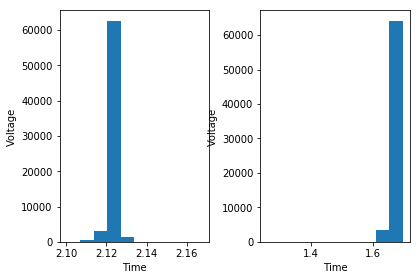

In [99]:
#Plotting Histogram

plt.subplot(1,2,1)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.tight_layout()
plt.hist(VpotenArray, bins = 10);

plt.subplot(1,2,2)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.tight_layout()
plt.hist(VphotoArray, bins = 10);

#Standard Deviation and Mean calculations 

np.mean([VphotoArray]);
np.mean([VphotoArray]);
np.std([VpotenArray]);
np.std([VpotenArray]);

plt.show();


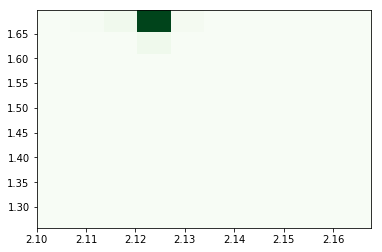

In [100]:
#2D Histogram plot

plt.hist2d(VpotenArray,VphotoArray, bins=10, cmap='Greens');
plt.np.std(VpotenArray);

# Results

Include here your data analysis. Discuss in markdown cells all the relevant results and conclusions.

# Post Lab

<img src="http://www.dropbox.com/s/fcucolyuzdjl80k/todo.jpg?raw=1" width="10%" align="left">

We will not actually test your code for this submission (that would take us a lot of time), so please make sure the outputs of your code cells contain the graphs. If your graphs aren't rendering in your notebook, use `plt.show()` to open the graph in a new window, then save the image and submit it with your notebook.

Once you complete the lab assignment, answer the following questions. Please give honest answers - you'll get full credit even if you tell us you hated this lab.

1. What elements of this lab did you find easy/challenging?
    * The lab in general was challenging for me, all new concepts. 
2. What did you like/dislike about this lab?
    * I liked that it forced me to learn a lot
3. If you did anything worthy of extra credit, tell us about it here!
    * I didn't get to do any extra credit

# Honor code
Unless explicitly specified, labs are **individual exercises**. Your submission is subject to the [**Mines Honor Code**](http://inside.mines.edu/~epoeter/_GW/CSMHonorCodeUndergradHandbook.pdf).